In [1]:
import pandas as pd

In [2]:
urlFilme = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
listaFilmes = pd.read_csv(urlFilme)
listaFilmes.columns = ['Id', 'Titulo', 'Generos']
listaFilmes.head()

,Id,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = listaFilmes.Generos.str.get_dummies()
dadosFilmes = pd.concat([listaFilmes,generos], axis = 1)
dadosFilmes.head()

,Id,Titulo,Generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [5]:
from sklearn.cluster import KMeans

In [6]:
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)
print(modelo.labels_)

[2 2 0 ... 0 2 0]


In [7]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.0317986  -0.17221517 -0.09609698 -0.25282145 -0.27045122  0.183437
  -0.27808305  0.11306209  0.07053001 -0.08885492 -0.08989352 -0.11613781
  -0.05843697  0.01018049 -0.22047572  0.16322315 -0.07526955 -0.48687277
   0.07115097  0.04056819]
 [-0.05917995  0.45087365 -0.10765877 -0.2333134  -0.26719745 -0.55963096
   0.84717995 -0.21354076  0.05127256 -0.12248588  0.27115761  0.4108626
   0.02091406 -0.17489929  0.62305687 -0.31634824  0.14400667  1.45127272
  -0.11752555 -0.07204999]
 [-0.05917995 -0.00864732  0.90222182  2.24759932  2.4488033   0.20962694
  -0.31476151 -0.20253474 -0.59213503  0.89214979 -0.09492563 -0.27549544
   0.33054416  0.37480914 -0.12679203 -0.27202043  0.1301769  -0.47033271
  -0

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.031799,-0.172215,-0.096097,-0.252821,-0.270451,0.183437,-0.278083,0.113062,0.070530,-0.088855,-0.089894,-0.116138,-0.058437,0.010180,-0.220476,0.163223,-0.075270,-0.486873,0.071151,0.040568
1,-0.059180,0.450874,-0.107659,-0.233313,-0.267197,-0.559631,0.847180,-0.213541,0.051273,-0.122486,0.271158,0.410863,0.020914,-0.174899,0.623057,-0.316348,0.144007,1.451273,-0.117526,-0.072050
2,-0.059180,-0.008647,0.902222,2.247599,2.448803,0.209627,-0.314762,-0.202535,-0.592135,0.892150,-0.094926,-0.275495,0.330544,0.374809,-0.126792,-0.272020,0.130177,-0.470333,-0.170020,-0.084214


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d10ae4400>,
      dtype=object)

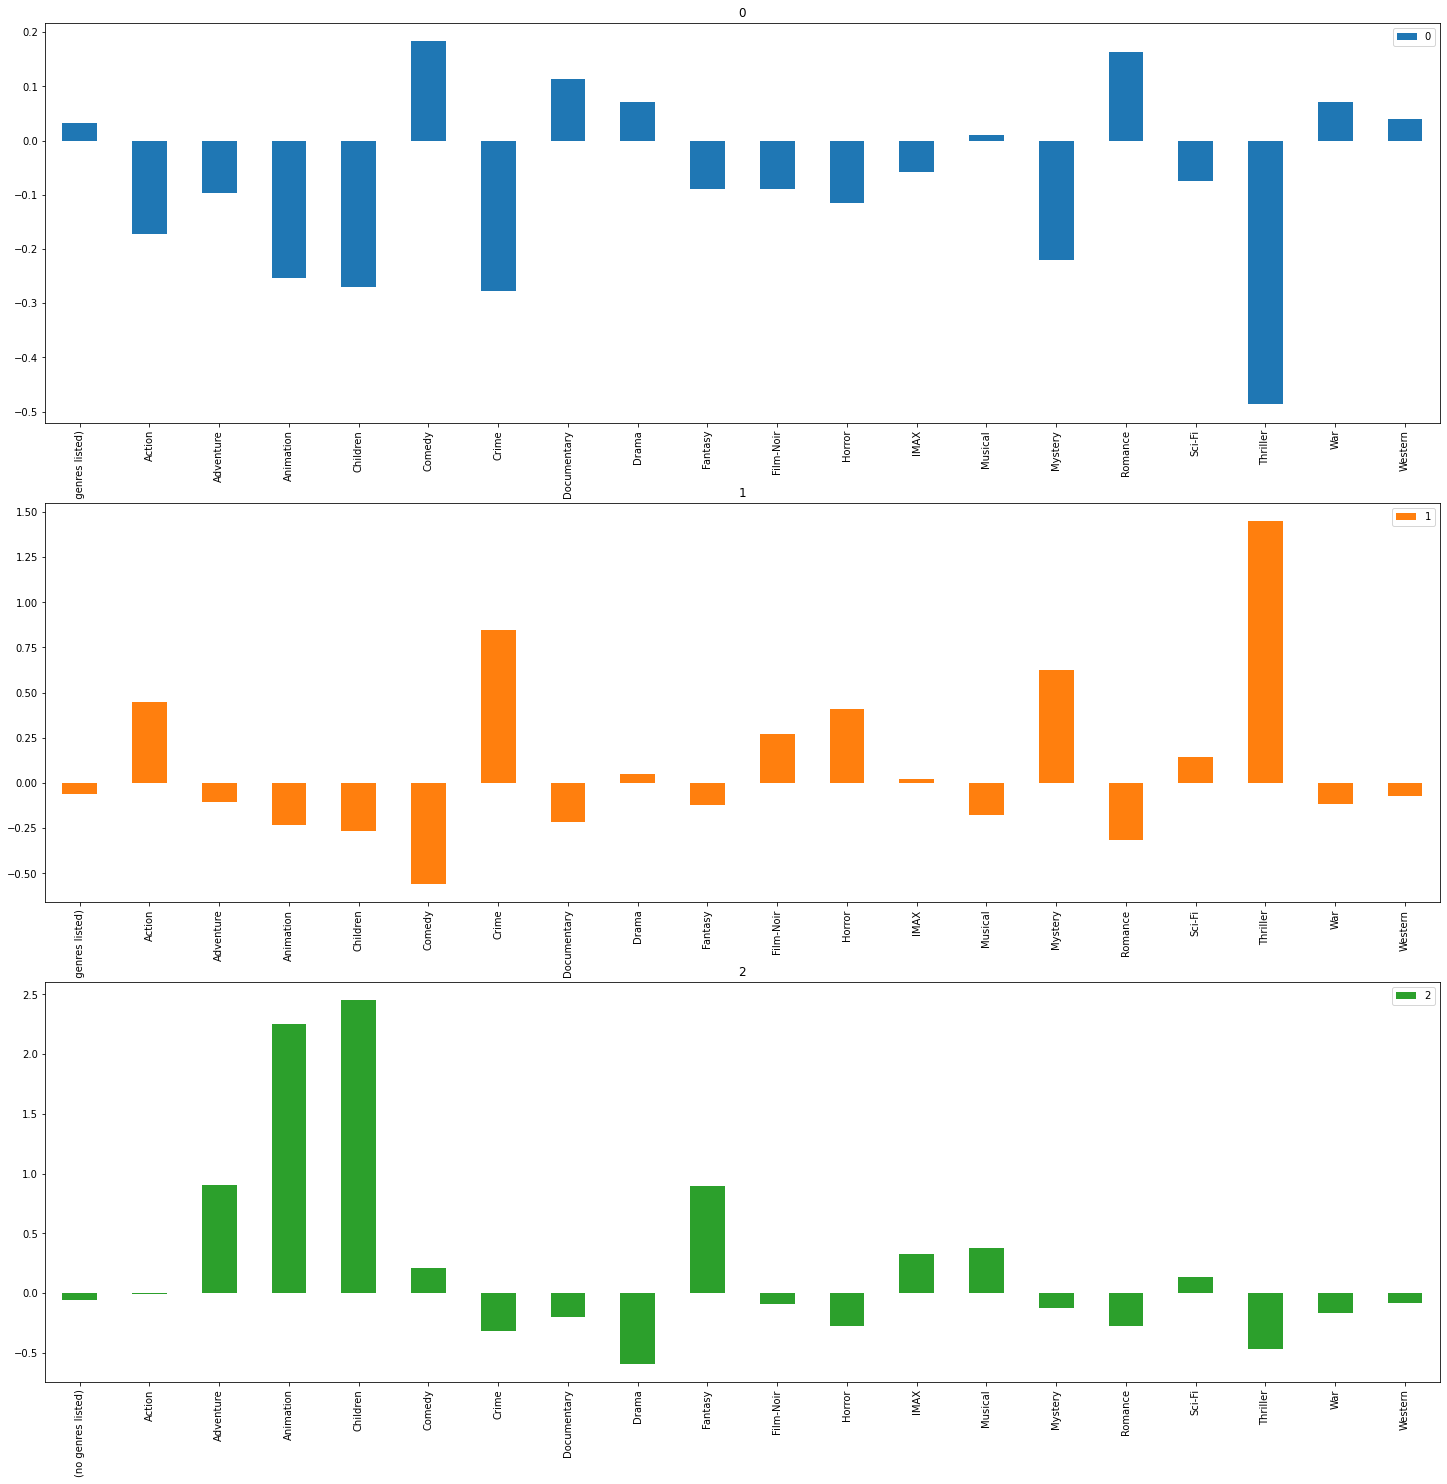

In [9]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [11]:
grupo = 0

filtro = modelo.labels_ == grupo

dadosFilmes[filtro].sample(10)

,Id,Titulo,Generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2678,3586,The Idolmaker (1980),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
864,1137,Hustler White (1996),Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6976,66509,Funny People (2009),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7980,96616,That's My Boy (2012),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8890,134393,Trainwreck (2015),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
425,488,M. Butterfly (1993),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9316,159779,A Midsummer Night's Dream (2016),(no genres listed),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5316,8827,"Bill Cosby, Himself (1983)",Comedy|Documentary,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2367,3141,"Two Jakes, The (1990)",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7522,84374,No Strings Attached (2011),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [15]:
from sklearn.manifold import TSNE
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-73.36042  ,   8.282057 ],
       [-25.432043 ,  74.194084 ],
       [-27.153435 , -13.088715 ],
       ...,
       [ -6.860877 ,  15.430258 ],
       [-55.802856 ,   5.2738485],
       [  0.7980225, -22.505693 ]], dtype=float32)

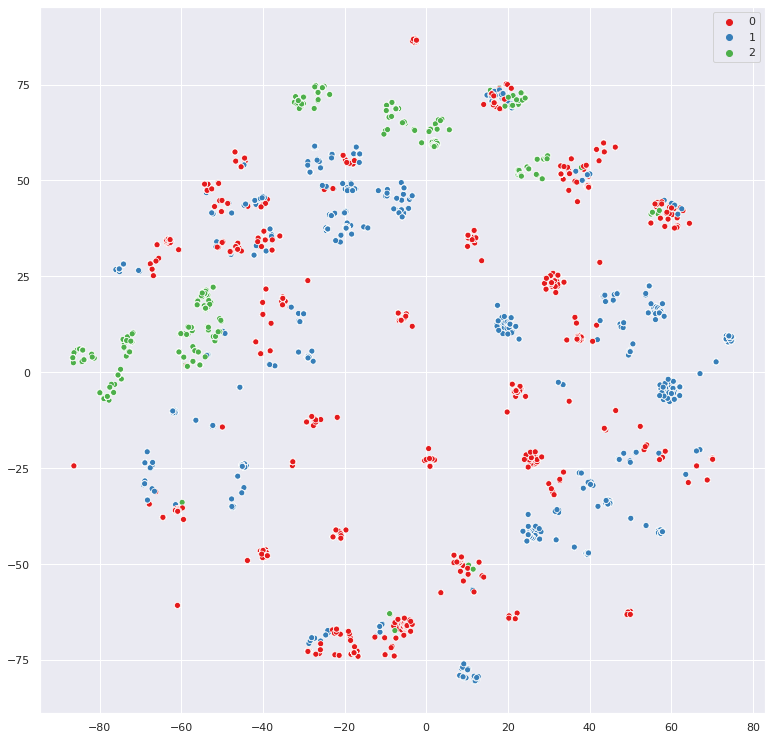

In [16]:
sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d10870d68>,
      dtype=object)

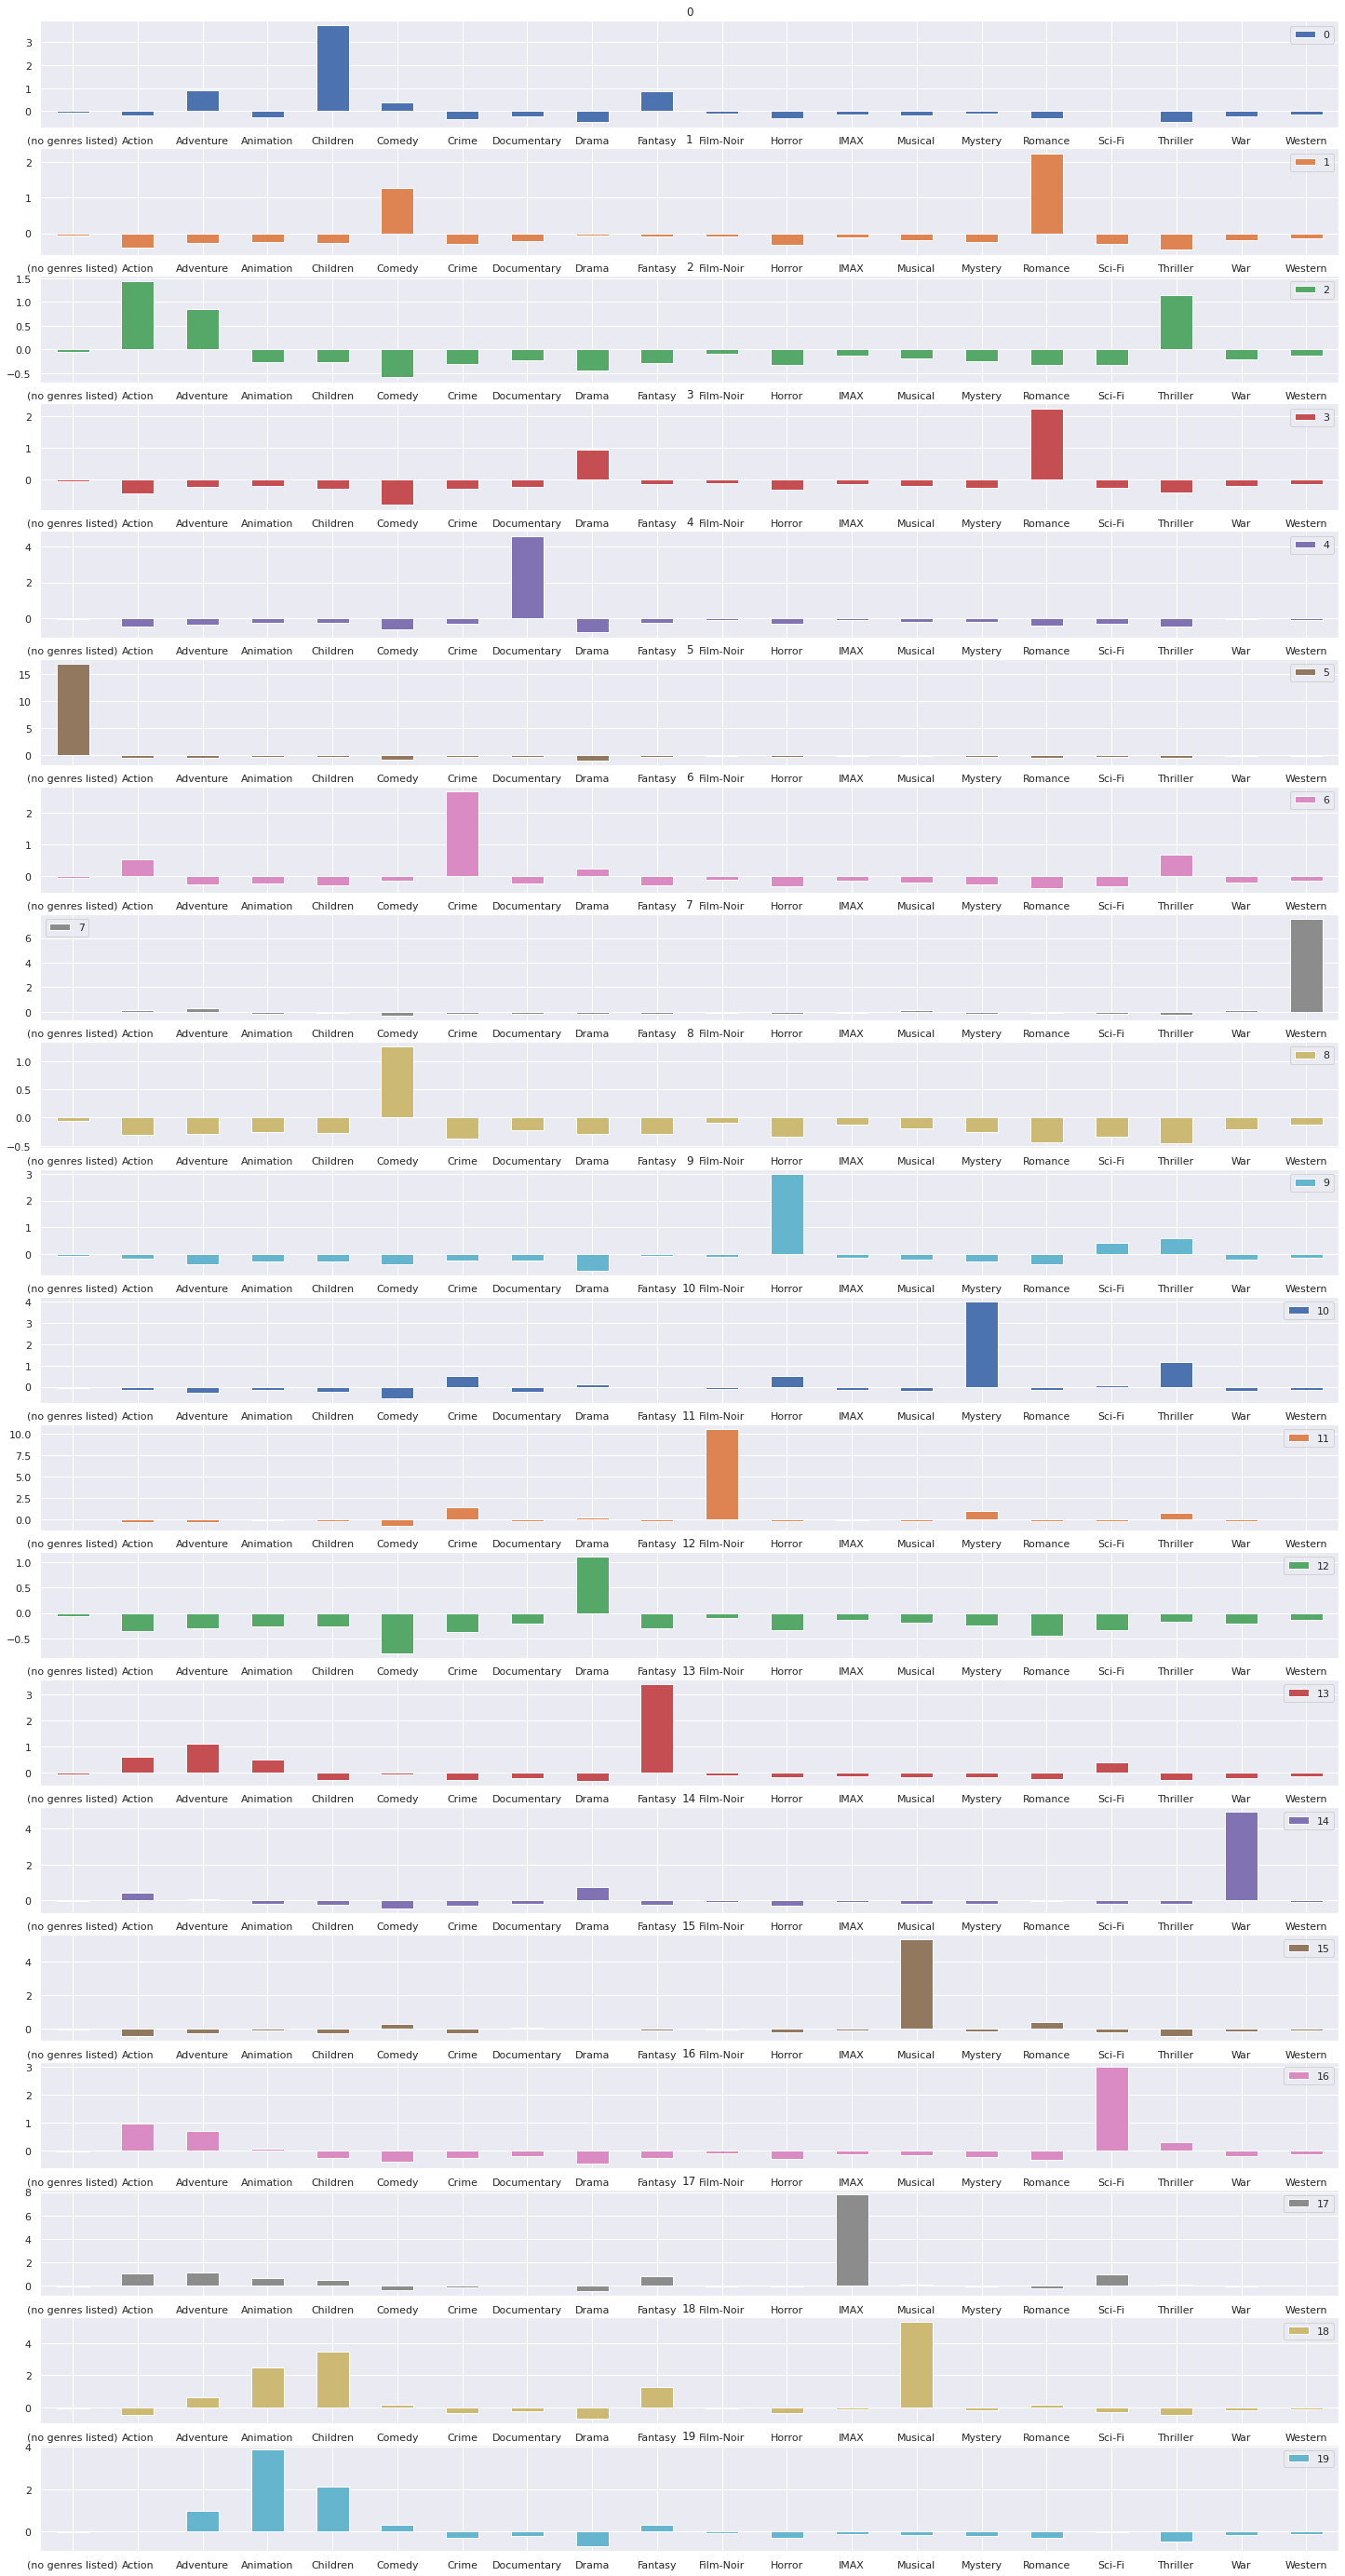

In [17]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [18]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.113319,-0.290039,-0.258679,-0.270451,-0.789531,-0.374632,-0.217489,0.851644,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,0.094560,-0.20202,-0.132065
1,-0.05918,0.479884,-0.297348,-0.248859,-0.270451,-0.153748,2.669289,-0.217489,0.258503,-0.281643,-0.094926,-0.326132,-0.128397,-0.188419,-0.249986,-0.304325,-0.310688,0.672895,-0.20202,-0.132065
2,-0.05918,-0.191556,0.911226,-0.258679,3.697524,0.392944,-0.346005,-0.217489,-0.465254,0.860935,-0.094926,-0.313193,-0.128397,-0.188419,-0.116751,-0.307118,0.009485,-0.475417,-0.20202,-0.132065
3,-0.05918,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.20202,-0.043513
4,-0.05918,-0.052470,-0.359758,-0.246584,-0.270451,-0.593299,-0.124691,-0.217489,-0.516908,-0.024515,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.395094,0.357775,2.035586,-0.20202,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d0b68bc50>,
      dtype=object)

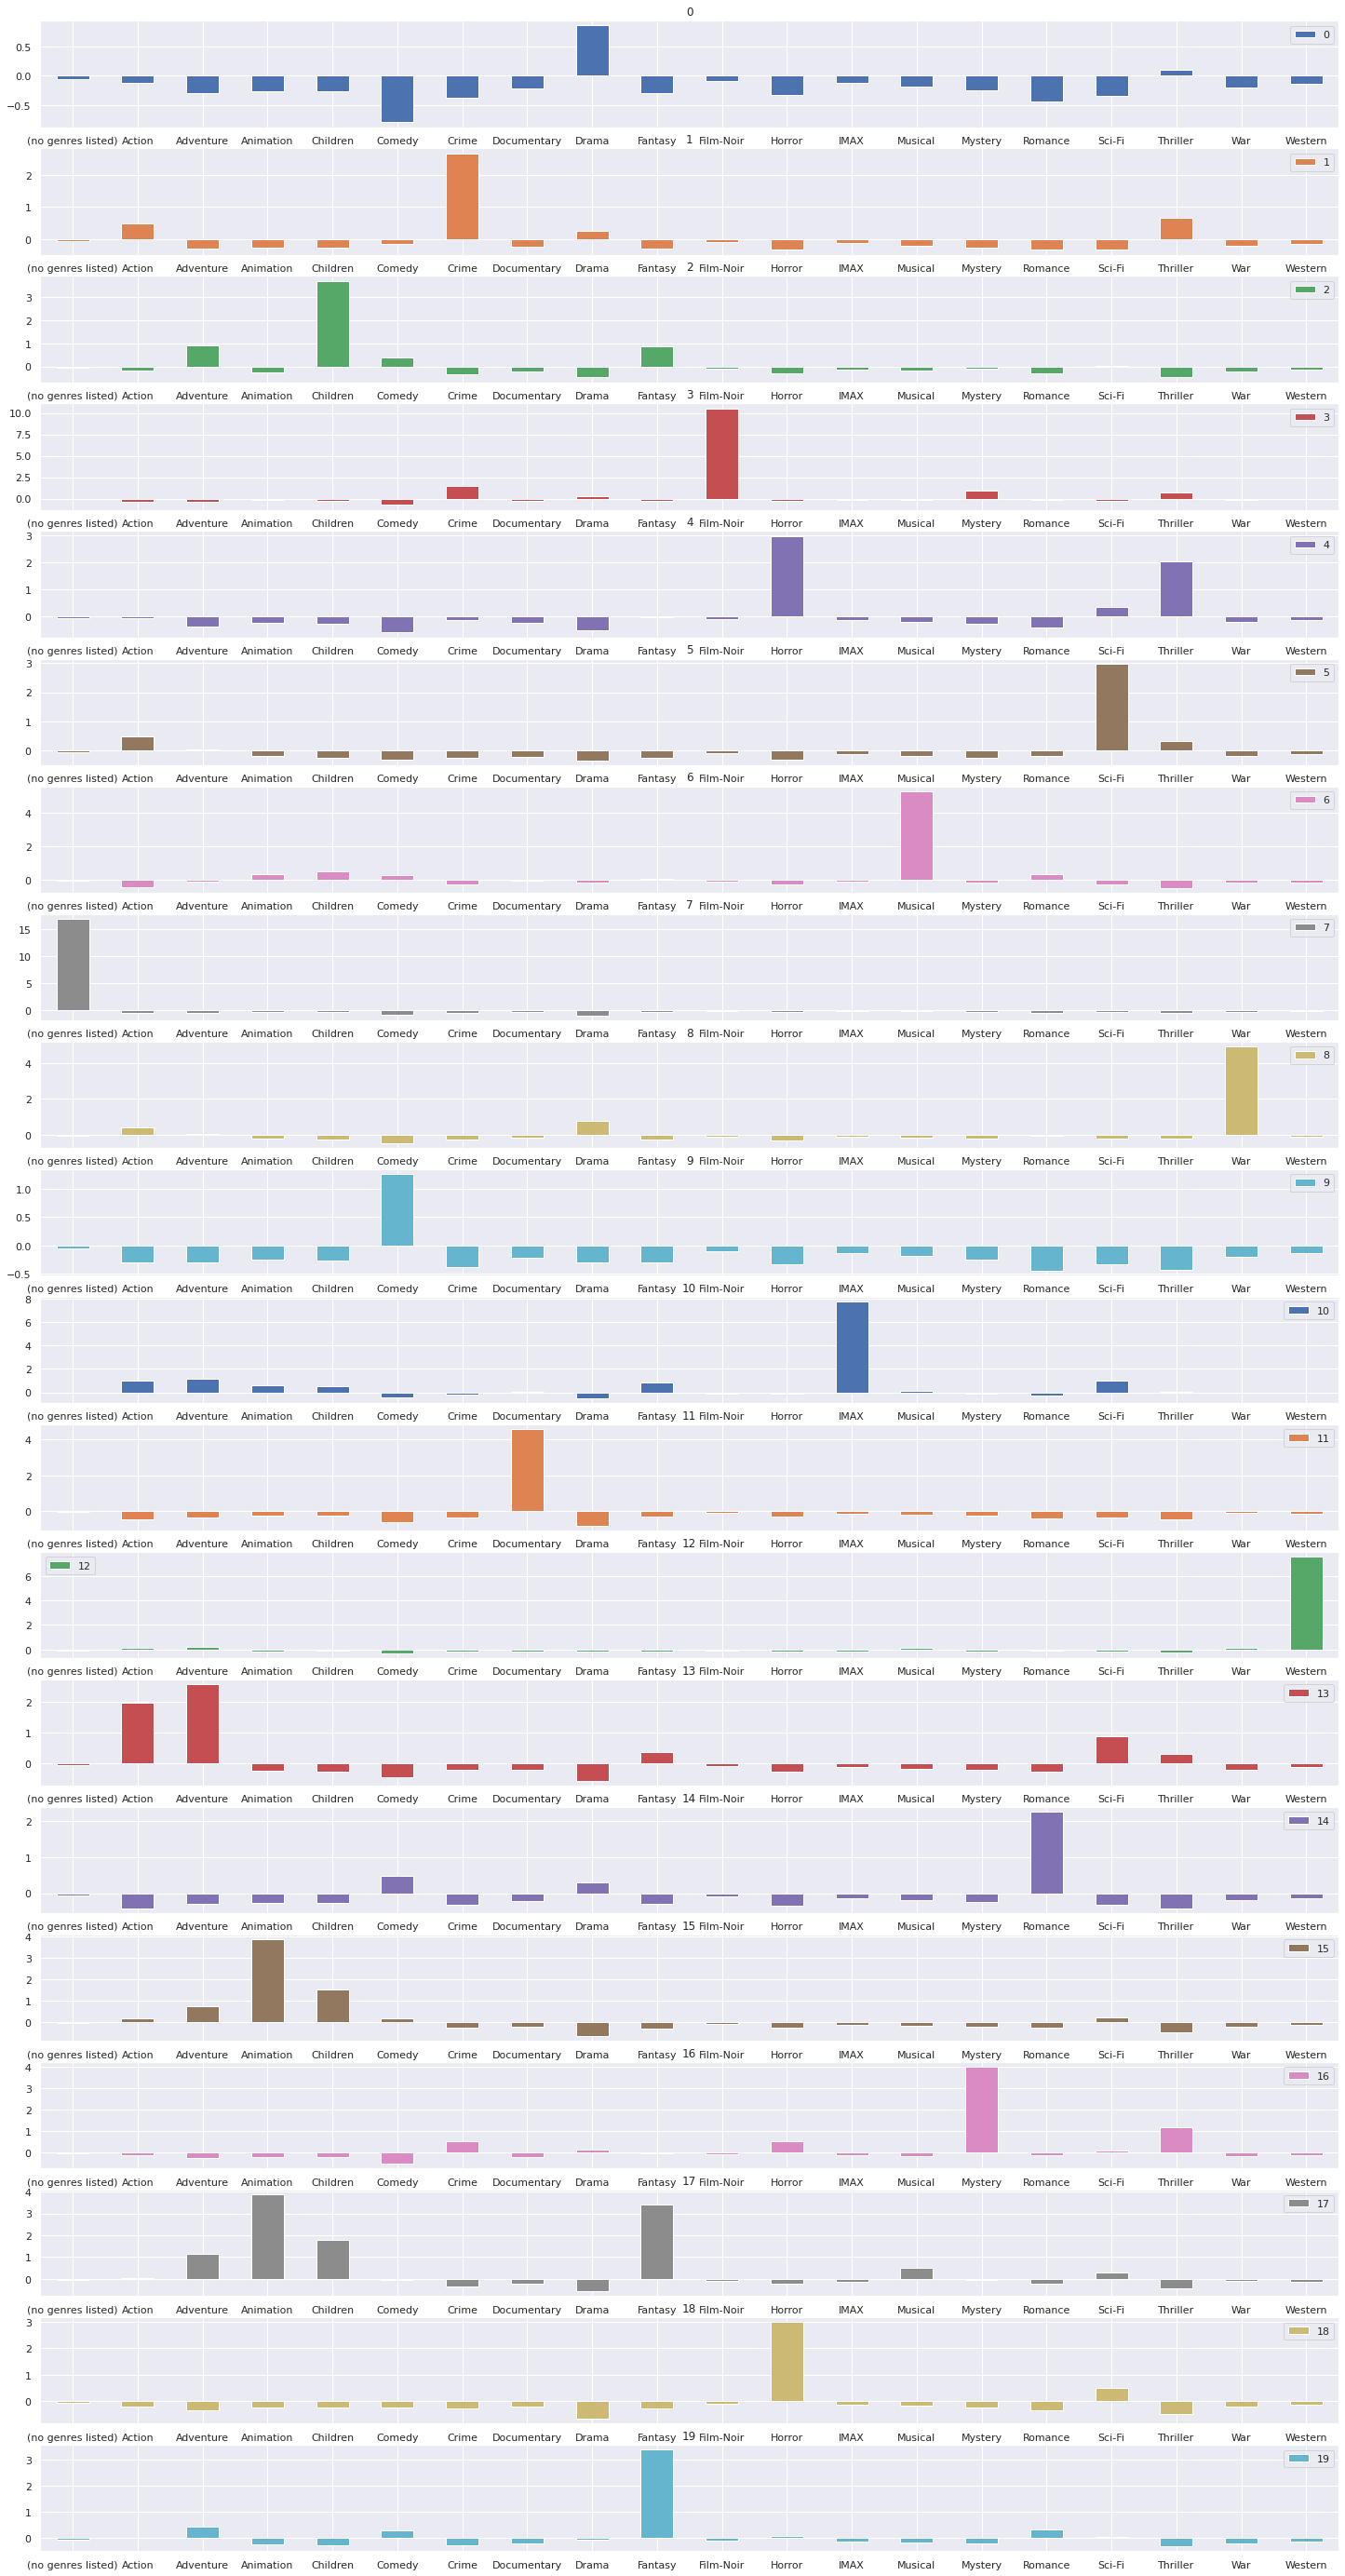

In [22]:
grupos.transpose().plot.bar(subplots=True,figsize=(25,50),sharex=False,rot=0)

In [24]:
grupo = 2

filtro = modelo.labels_ == grupo

dadosFilmes[filtro].sample(10)

,Id,Titulo,Generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
153,181,Mighty Morphin Power Rangers: The Movie (1995),Action|Children,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
421,484,Lassie (1994),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5777,31422,Are We There Yet? (2005),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637,810,Kazaam (1996),Children|Comedy|Fantasy,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1520,2052,Hocus Pocus (1993),Children|Comedy|Fantasy|Horror,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4309,6297,Holes (2003),Adventure|Children|Comedy|Mystery,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6779,60289,Kit Kittredge: An American Girl (2008),Children|Comedy|Drama|Mystery,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
751,986,Fly Away Home (1996),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
767,1009,Escape to Witch Mountain (1975),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6389,50601,Bridge to Terabithia (2007),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [27]:
kmeans(20, generos_escalados)

[20, 54904.075450730874]

In [28]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179909.54996425138],
 [3, 166161.90537703823],
 [4, 157286.30331757877],
 [5, 147302.26950544812],
 [6, 138011.29204307692],
 [7, 129049.85139481387],
 [8, 120082.72188583696],
 [9, 110504.26396364233],
 [10, 102898.22558957663],
 [11, 95254.46975214336],
 [12, 87479.27911393168],
 [13, 79670.49141783056],
 [14, 73353.15885644422],
 [15, 68122.00257555365],
 [16, 63109.29038482956],
 [17, 61568.04964306469],
 [18, 58648.71756100012],
 [19, 56441.839213021456],
 [20, 55461.9497652746],
 [21, 53837.8131372262],
 [22, 52260.72414535217],
 [23, 50846.52797830559],
 [24, 49163.495996693884],
 [25, 48347.06056836047],
 [26, 46512.1851043368],
 [27, 45751.150150202055],
 [28, 44929.84347028089],
 [29, 43248.67170828334],
 [30, 42436.446192501855],
 [31, 42016.74861636169],
 [32, 40929.36466648949],
 [33, 40056.73706032894],
 [34, 39934.59769716331],
 [35, 37966.57336487183],
 [36, 38591.10490299347],
 [37, 37996.53706744762],
 [38, 36634.51276310415],
 [39, 35665.59508067

In [29]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179909.549964
2,3,166161.905377
3,4,157286.303318
4,5,147302.269505
5,6,138011.292043
6,7,129049.851395
7,8,120082.721886
8,9,110504.263964
9,10,102898.225590


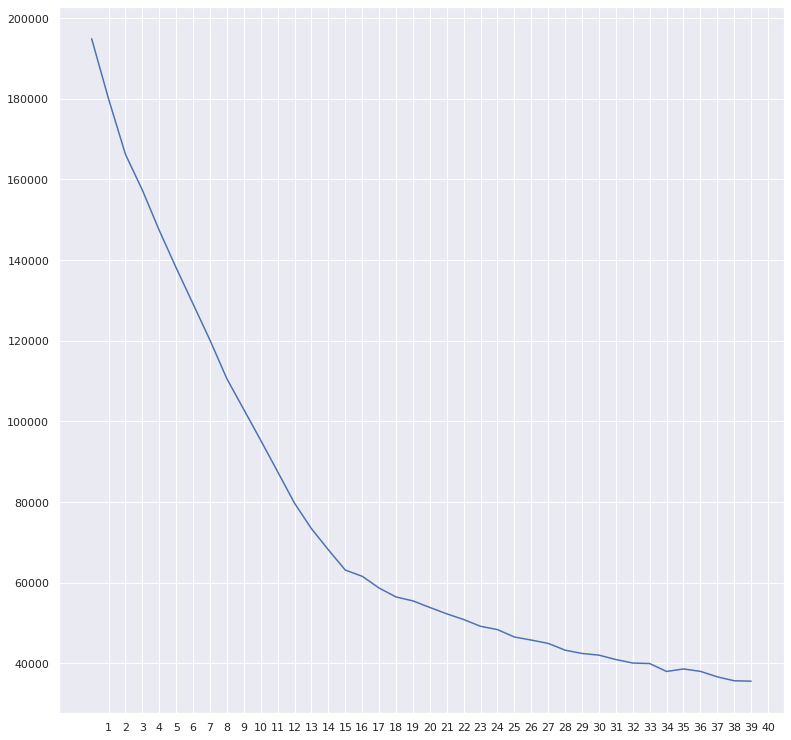

In [30]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d0a183da0>,
      dtype=object)

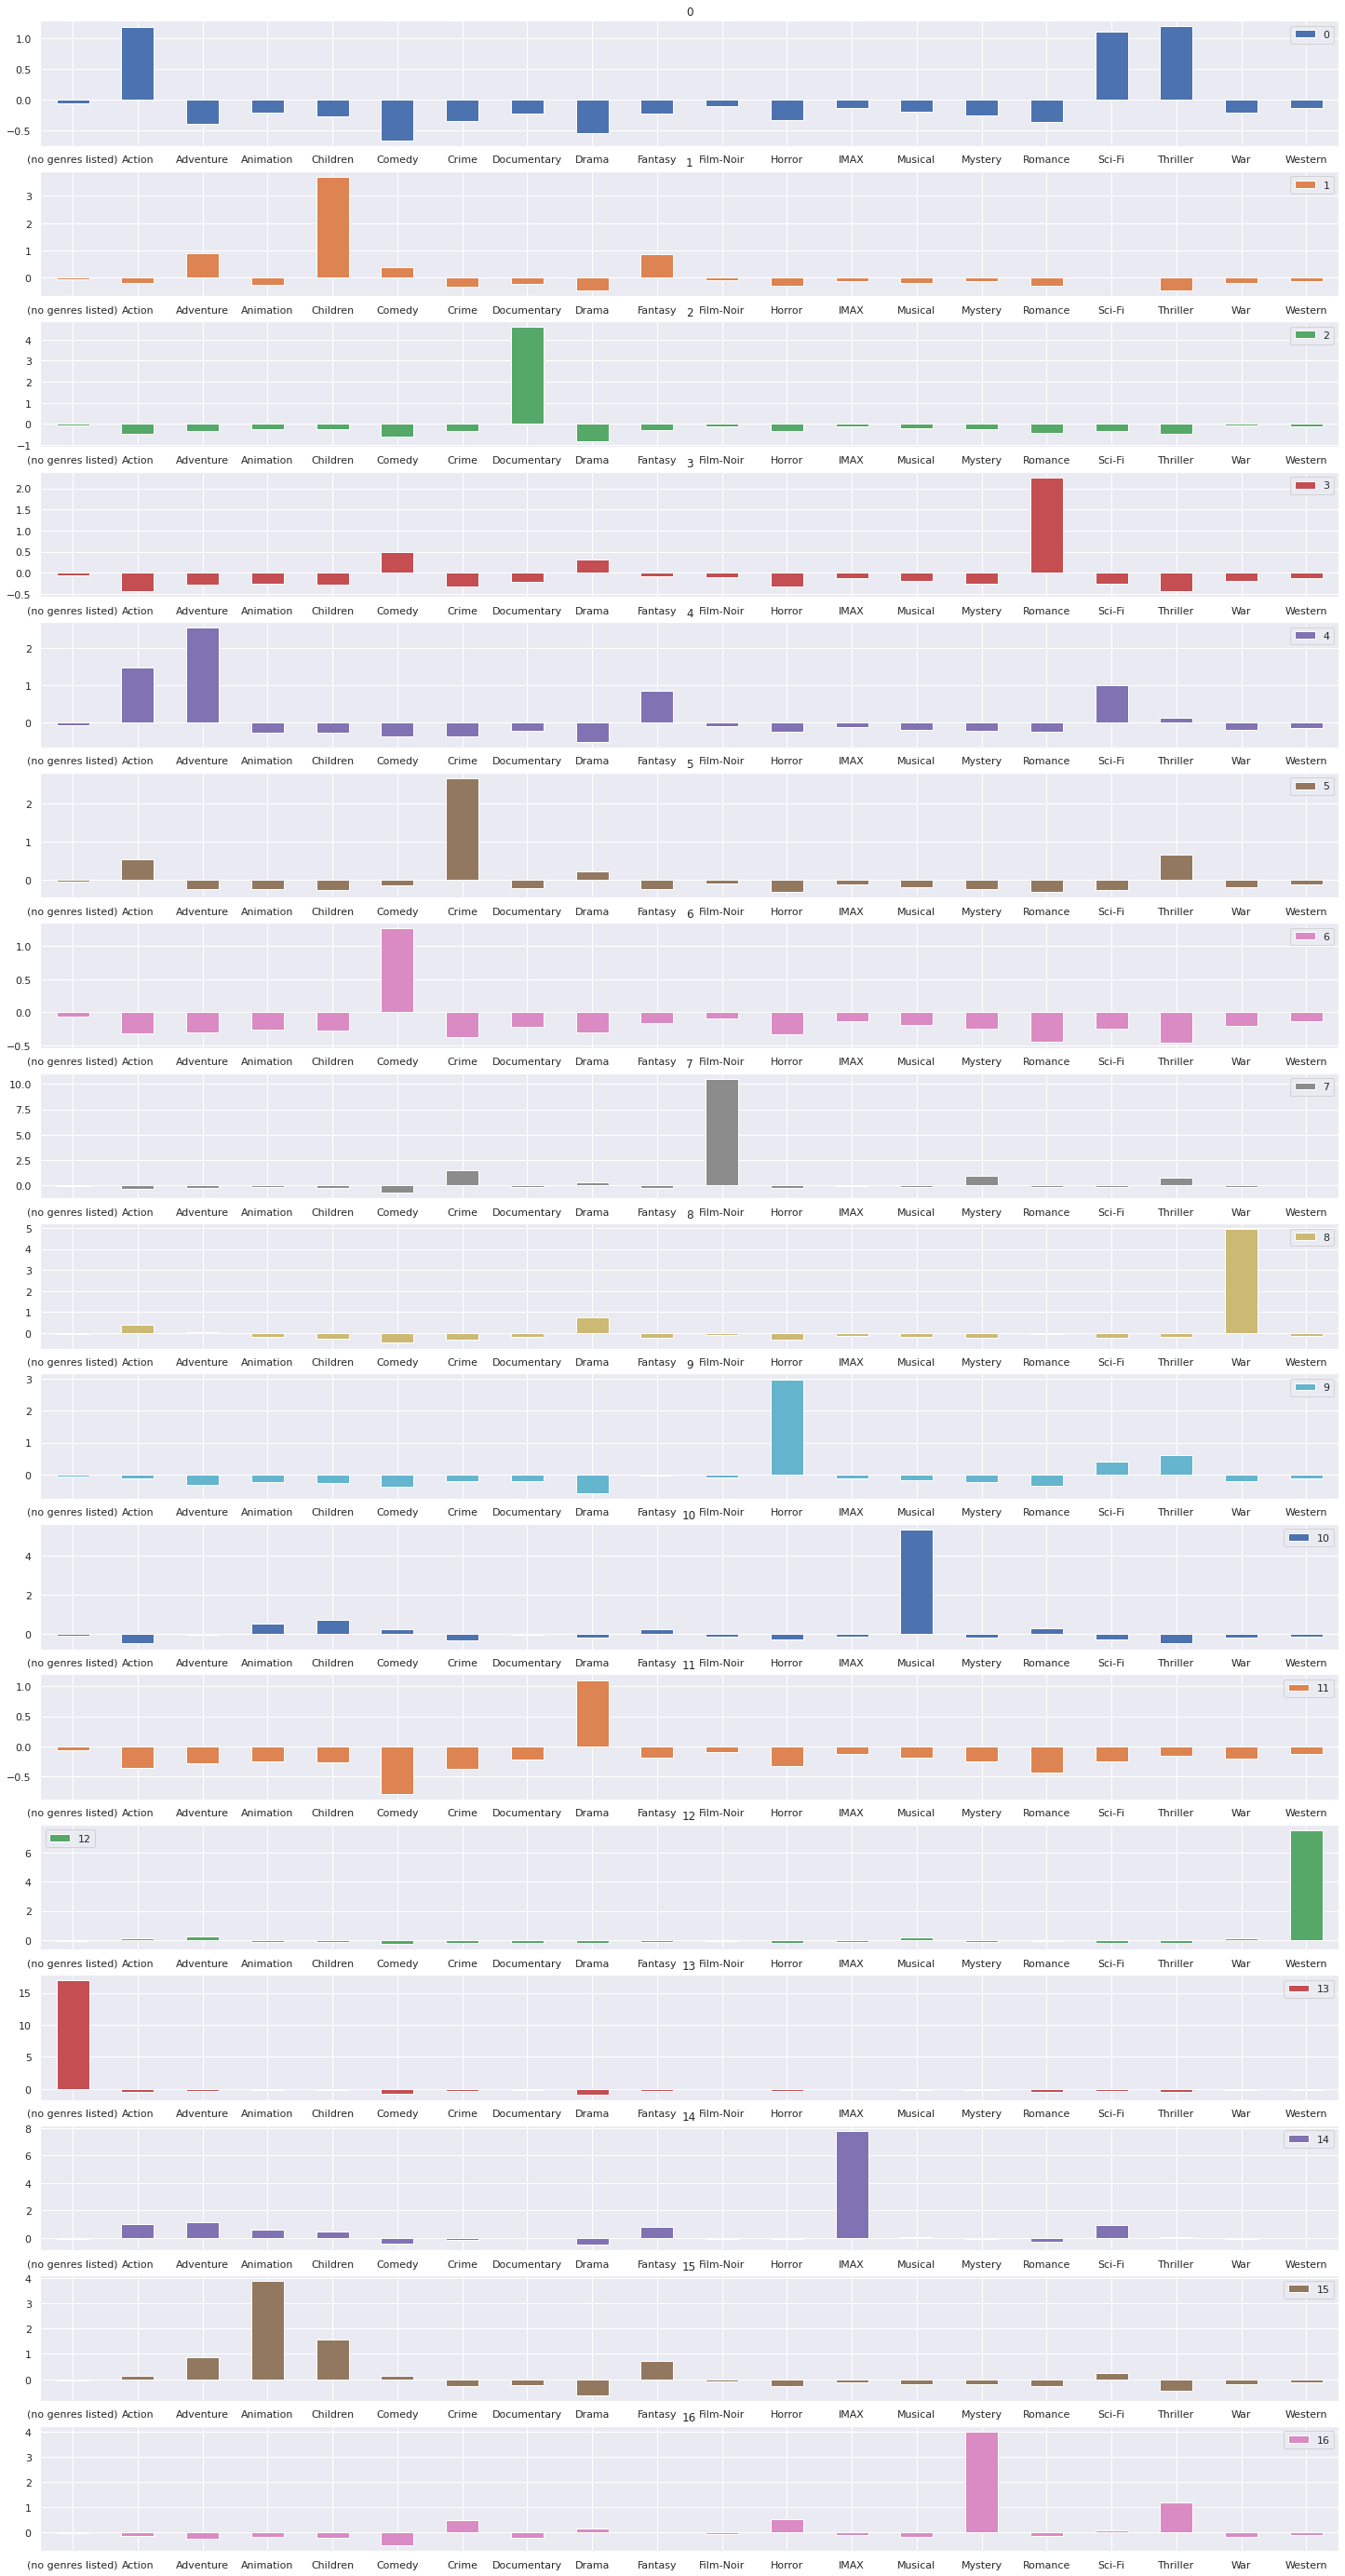

In [31]:

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [34]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 45.649944 ,  45.32434  ],
       [-15.71355  ,  59.487617 ],
       [-58.181515 ,  -2.947471 ],
       ...,
       [ 23.960617 ,  -4.419208 ],
       [  5.0788035,  29.764658 ],
       [-14.522814 ,  -6.100451 ]], dtype=float32)

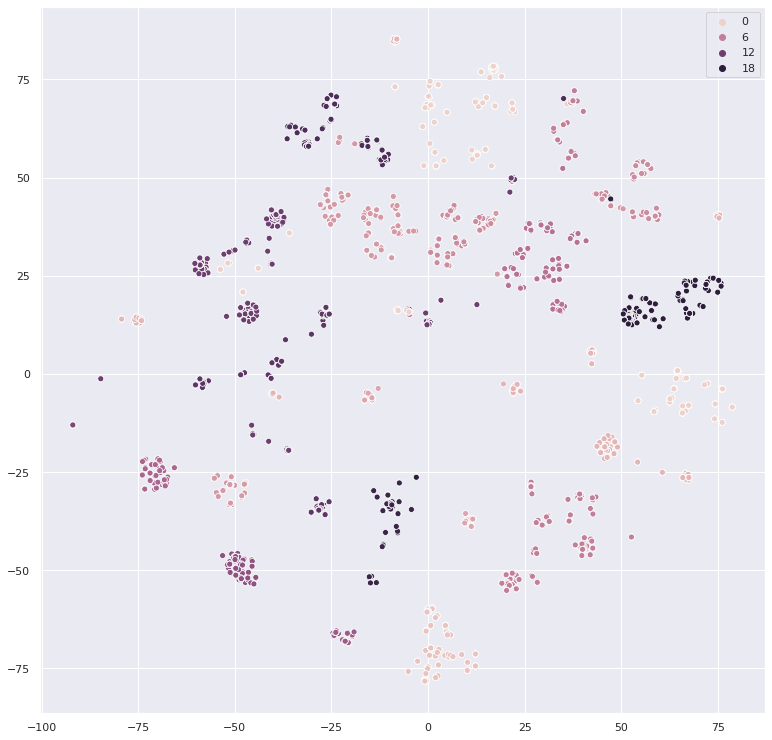

In [35]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d08edc160>,
      dtype=object)

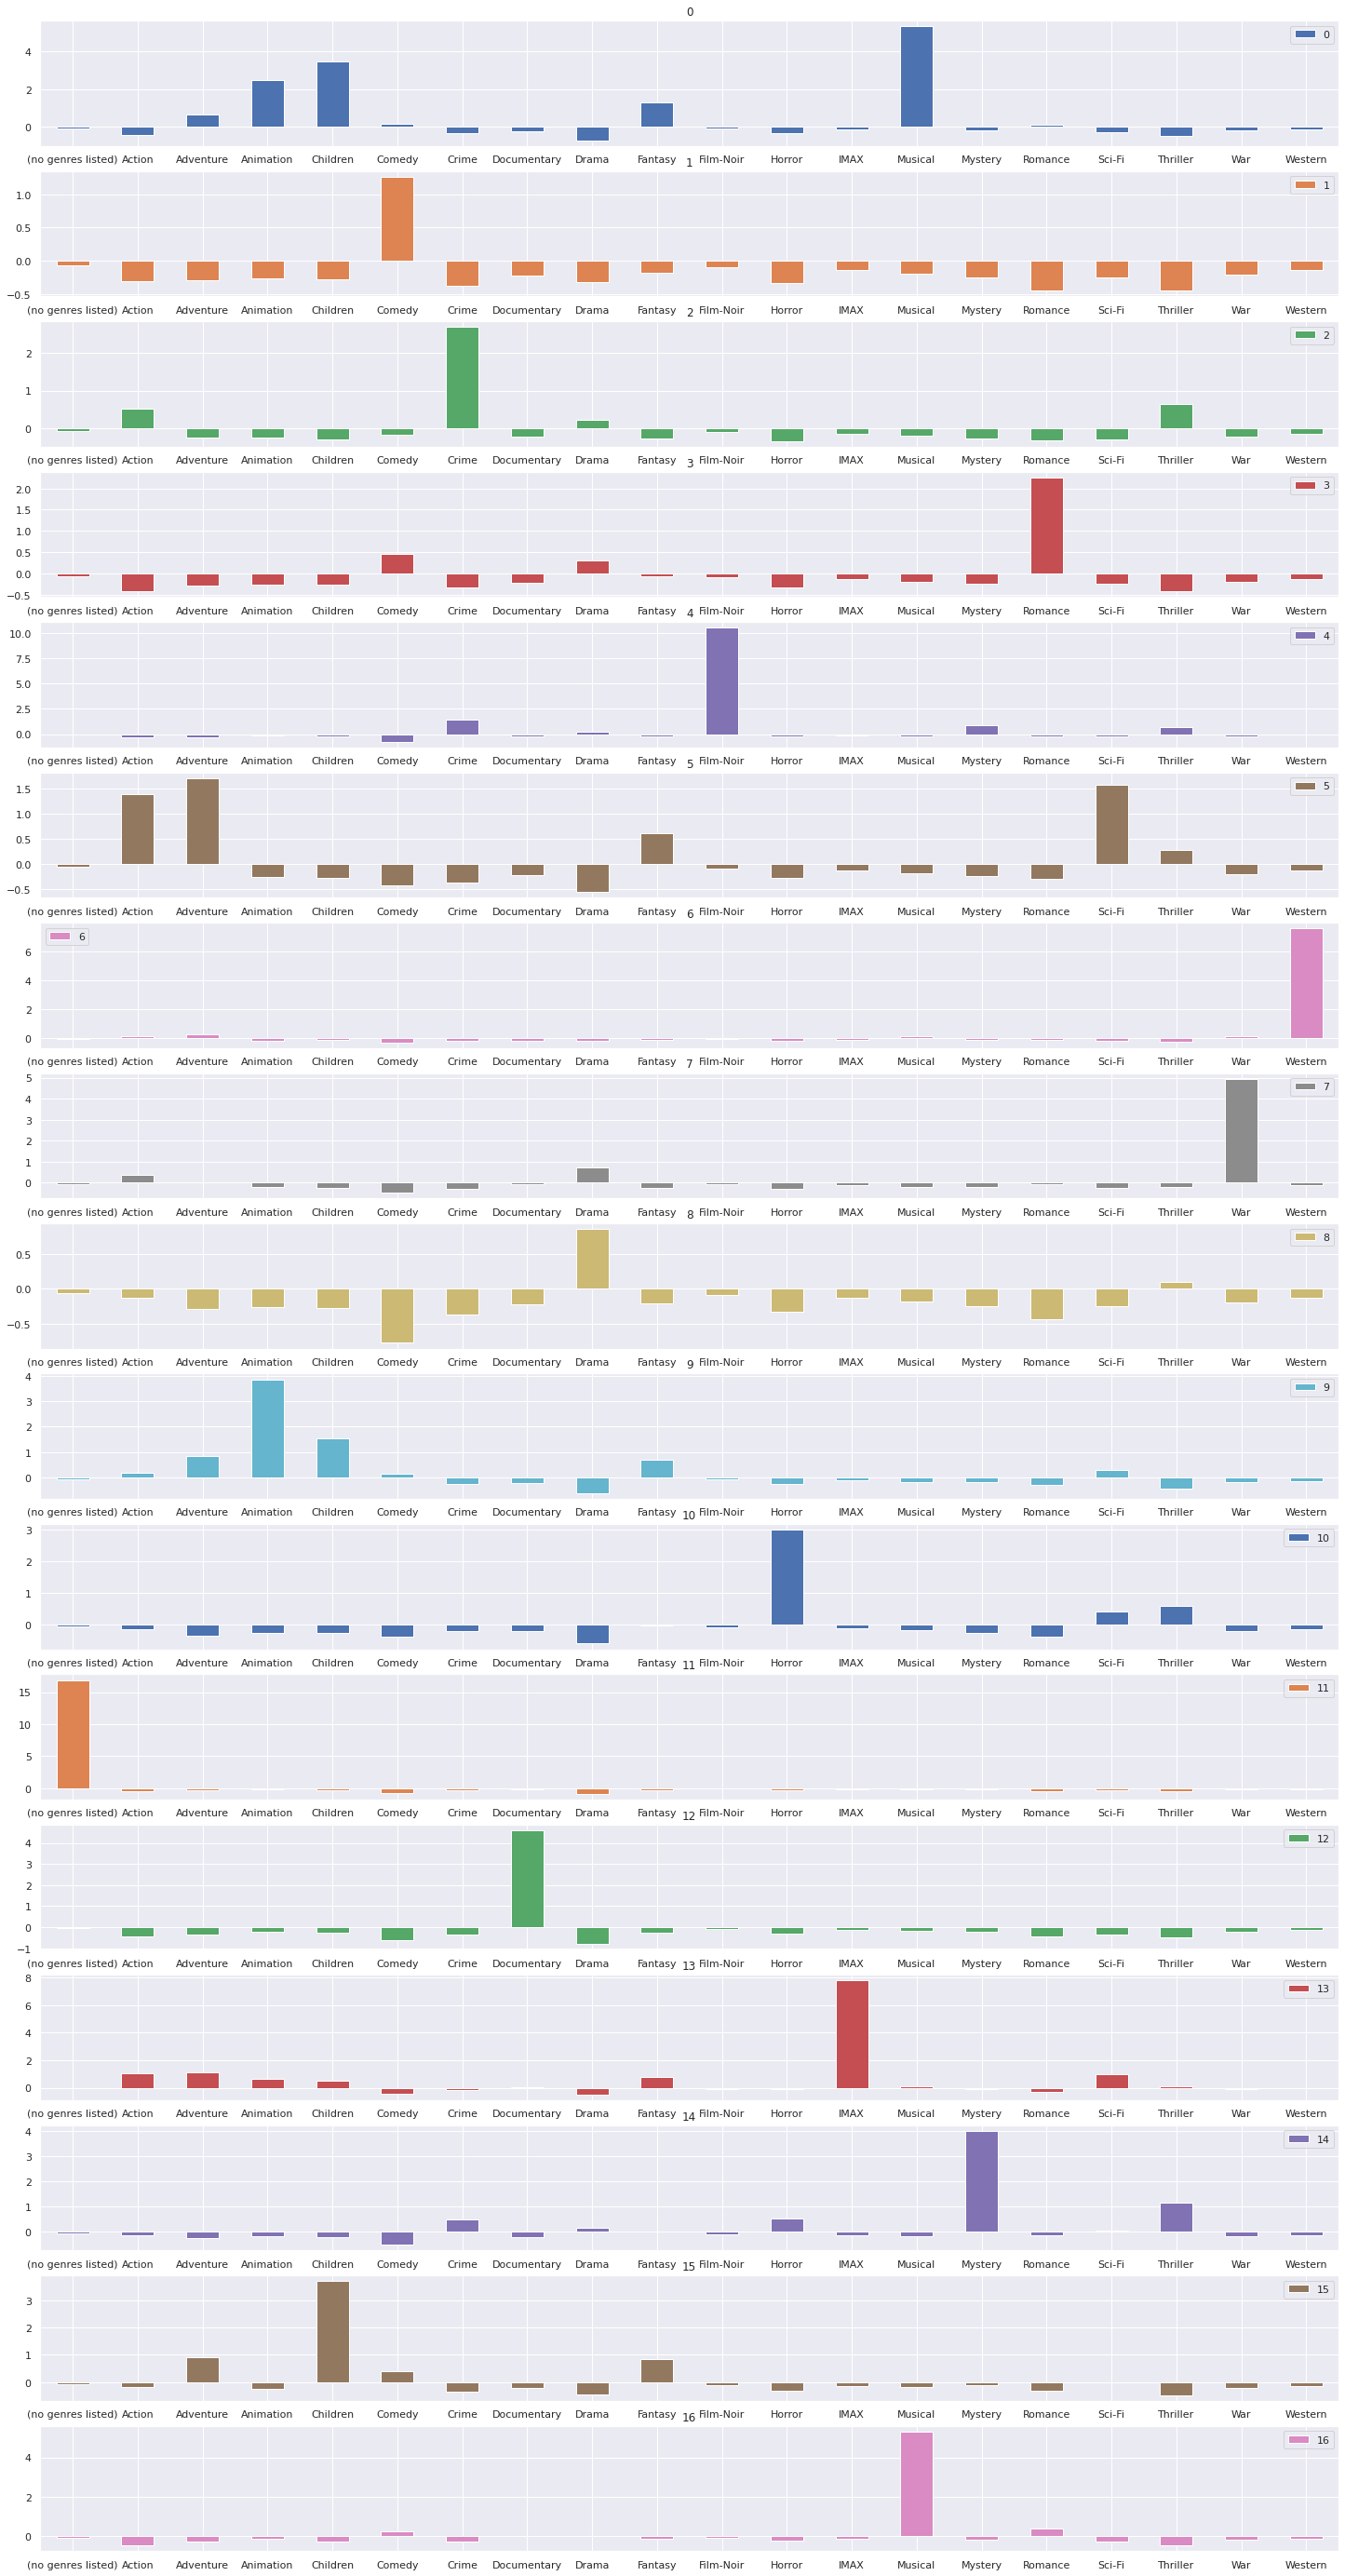

In [37]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [38]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  8.        ,  2.42577509,  2.        ],
       [ 3.        , 17.        ,  2.88909196,  3.        ],
       [ 2.        , 18.        ,  3.29055903,  4.        ],
       [ 5.        , 19.        ,  3.53969169,  5.        ],
       [10.        , 20.        ,  3.75498925,  6.        ],
       [15.        , 21.        ,  4.37915902,  7.        ],
       [14.        , 22.        ,  4.63406443,  8.        ],
       [ 9.        , 23.        ,  4.69237742,  9.        ],
       [ 0.        , 16.        ,  4.9253709 ,  2.        ],
       [12.        , 24.        ,  5.14455405, 10.        ],
       [ 7.        , 26.        ,  5.22456954, 11.        ],
       [25.        , 27.        ,  5.66625029, 13.        ],
       [ 6.        , 28.        ,  7.84717614, 14.        ],
       [13.        , 29.        ,  8.07589263, 15.        ],
       [ 4.        , 30.        , 10.81689921, 16.        ],
       [11.        , 31.        , 17.06272258, 17.        ]])

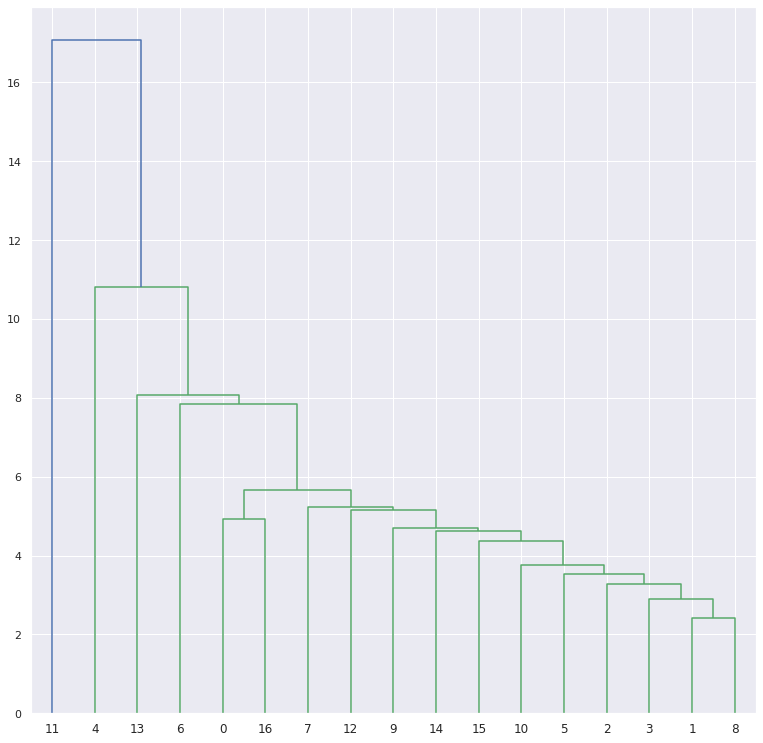

In [39]:
dendrograma = dendrogram(matriz_de_distancia)